In [64]:
# import
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA
from patterns import Hammer
from patterns import Doji

In [65]:
# read crypto csv into a dataframe
CC_df = pd.read_csv(
    Path("historical_CC.csv"), 
    parse_dates = True, 
    infer_datetime_format = True
)
CC_df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984


In [66]:
# plot crypto 'Close'
CC_df['Close'].hvplot()

:Curve   [index]   (Close)

In [67]:
# instantiate
hammer = Hammer(CC_df)
doji = Doji(CC_df)
# Finally compute detection
pattern_df = hammer.compute_pattern()
doji_df = doji.compute_pattern()
pattern_df

,Date,Open,High,Low,Close,Volume,hammer,doji
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,False,False
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,False,False
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,False,False
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,False,False
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,False,False
...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,False,False
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,False,False
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,False,False
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,False,False


In [68]:
# Hammer Signal column to buy and sell 
# Set the Signal column
pattern_df["Signal"] = 0.0
in_pattern = False

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the hammer pattern is recognize to buy
# where -1 is when the hammer pattern is recognize to sell
for index, row in pattern_df.iterrows():
    # Buy when there is a hammer and it is not in a pattern 
    #if row["hammer"] == True and in_pattern == False:
    if row["hammer"] == True:
        pattern_df.loc[index, "Signal"] = 1.0
        in_pattern = True
    # Sell when there is a doji candle and reset in_pattern variable
    #elif row["doji"] == True and in_pattern == True:
    elif row["doji"] == True:
        pattern_df.loc[index,"Signal"] = -1.0
        in_pattern = False

# Review the DataFrame
pattern_df

,Date,Open,High,Low,Close,Volume,hammer,doji,Signal
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,False,False,0.0
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,False,False,0.0
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,False,False,0.0
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,False,False,0.0
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,False,False,0.0
...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,False,False,0.0
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,False,False,0.0
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,False,False,0.0
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,False,False,0.0


<AxesSubplot: >

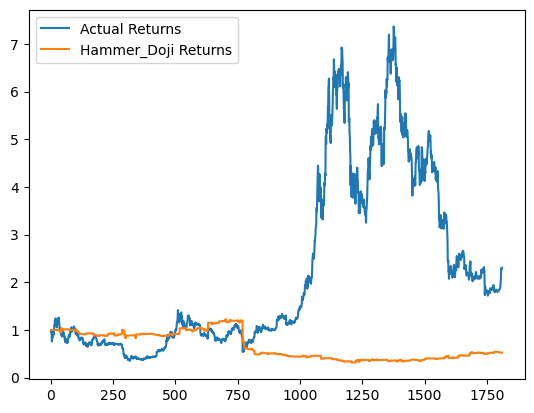

In [69]:
# Compute Actual Returns
# pct_change function to generate returns from close prices
pattern_df["Actual Returns"] = pattern_df["Close"].pct_change()

# add strategy returns to pattern_df
pattern_df['Hammer_Doji Returns'] = pattern_df['Actual Returns'] * pattern_df['Signal'].shift()

# Plot Hammer_Doji Returns to examine performance
(1 + pattern_df[["Actual Returns", "Hammer_Doji Returns"]]).cumprod().plot()

In [70]:
# Visualize entry position relative to close price
entry = pattern_df[pattern_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = pattern_df[pattern_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize close price for the investment
cc_close = pattern_df[["Close"]].hvplot(
    line_color="gray",
    ylabel="$",
    width=1000,
    height=400
)

# Overlay plots
pattern_plot = cc_close  * entry * exit
pattern_plot

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [71]:
### Market Momentum 'MOM'
# Momentum is the rate of acceleration of a security's price—that is, the speed at which the price is changing. 
# Market momentum refers to the aggregate rate of acceleration for the broader market as a whole.
# Market Momentum average of 10 periods
# https://www.investopedia.com/terms/m/marketmomentum.asp
pattern_df['mm'] = TA.MOM(pattern_df, 10)
#mm_plot= pattern_df['mm'].hvplot.line(height=500,width=1000, yformatter='%.0f', title= "BTC Market Momentum", line_color='purple')
#mm_plot
pattern_df

,Date,Open,High,Low,Close,Volume,hammer,doji,Signal,Actual Returns,Hammer_Doji Returns,mm
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,False,False,0.0,NaN,NaN,NaN
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,False,False,0.0,-0.037052,-0.0,NaN
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,False,False,0.0,0.038973,0.0,NaN
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,False,False,0.0,-0.097865,-0.0,NaN
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,False,False,0.0,-0.159688,-0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,False,False,0.0,0.055114,0.0,3229.716797
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,False,False,0.0,0.053578,0.0,4113.060547
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,False,False,0.0,-0.004553,-0.0,4044.062500
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,False,False,0.0,0.013833,0.0,4217.664062


In [72]:
# Mom signal column to buy and sell 
# Set the Signal column
pattern_df["MM Signal"] = 0.0


# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the MM pattern is recognize to buy
# where -1 is when the MM pattern is recognize to sell
for index, row in pattern_df.iterrows():
    # Buy when there is a hammer and it is not in a pattern 
    if row["mm"] > 0:
        pattern_df.loc[index, "MM Signal"] = 1.0
        in_pattern = True
    # Sell when there is a doji candle and reset in_pattern variable
    elif row["mm"] < 0 :
        pattern_df.loc[index,"MM Signal"] = -1.0
        in_pattern = False

# Review the DataFrame
pattern_df

,Date,Open,High,Low,Close,Volume,hammer,doji,Signal,Actual Returns,Hammer_Doji Returns,mm,MM Signal
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,False,False,0.0,NaN,NaN,NaN,0.0
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,False,False,0.0,-0.037052,-0.0,NaN,0.0
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,False,False,0.0,0.038973,0.0,NaN,0.0
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,False,False,0.0,-0.097865,-0.0,NaN,0.0
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,False,False,0.0,-0.159688,-0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,False,False,0.0,0.055114,0.0,3229.716797,1.0
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,False,False,0.0,0.053578,0.0,4113.060547,1.0
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,False,False,0.0,-0.004553,-0.0,4044.062500,1.0
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,False,False,0.0,0.013833,0.0,4217.664062,1.0


<AxesSubplot: >

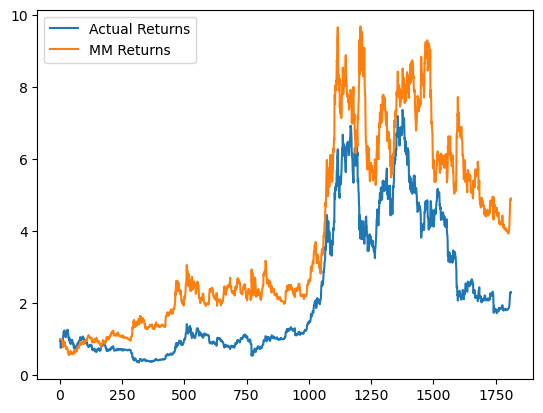

In [73]:
# add strategy returns to pattern_df
pattern_df['MM Returns'] = pattern_df['Actual Returns'] * pattern_df['MM Signal'].shift()

# Plot MM Returns to examine performance
(1 + pattern_df[["Actual Returns", "MM Returns"]]).cumprod().plot()

In [74]:
# Visualize entry position relative to close price
entry = pattern_df[pattern_df["MM Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = pattern_df[pattern_df["MM Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize close price for the investment
cc_close = pattern_df[["Close"]].hvplot(
    line_color="gray",
    ylabel="$",
    width=1000,
    height=400
)

# Overlay plots
pattern_plot = cc_close  * entry * exit
pattern_plot



:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)